[View in Colaboratory](https://colab.research.google.com/github/gr3ybr0w/cookbook/blob/master/Machine_Learning/clustering/Kmeans_Feature_Scaling.ipynb)

Before walking through the code there are a couple of helper functions that are being pulled in.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def simulate_data(n = 500, features = 10, centroids = 3):
    '''
    Simulates n data points, each with number of features equal to features, with a number of centers equal to centroids
    INPUT (defaults)
        n = number of rows (500)
        features = number of columns (10)
        centroids = number of centers (3)
    Output
        dataset = a dataset with the the specified characteristics
    '''
    dataset, y = make_blobs(n_samples=n, n_features=features, centers=centroids, random_state=42)

    return dataset

def plot_data(data, labels):
    '''
    Plot data with colors associated with labels
    '''
    fig = plt.figure();
    ax = Axes3D(fig)
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10');

data = simulate_data(200, 5, 4)

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)

    # Obtain a score related to the model fit
    score = np.abs(model.score(data))

    return score

def fit_mods():
    scores = []
    centers = list(range(1,11))

    for center in centers:
        scores.append(get_kmeans_score(data, center))

    return centers, scores

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def display_gif(fn):
    return '<img src="{}">'.format(fn)


def test_question_1(data1):
    if data1.shape[0] == 200 and data1.shape[1] == 5:
        print("Looks good!  Continue!")
    else:
        print("Oops, that looks different than what we expected!  The first argument should be the number of rows, the second the number of columns, and the final should be the number of centers.")

def test_question_2(k_value):
    if k_value == 4:
        print("That's right!  The value of k is the same as the number of centroids used to create your dataset.")
    else:
        print("Oops! That doesn't seem right!  The value of k should be the same as the number of centroids you used in your dataset.  In this case, the value for k should be 4.")

def test_question_7(k_value):
    if k_value == 4:
        print("That's right!  We set up the data with 4 centers, and the plot is consistent!  We can see a strong leveling off after 4 clusters, which suggests 4 clusters should be used.")

        return display_gif("https://media2.giphy.com/media/3ohzdIuqJoo8QdKlnW/giphy.gif")
    else:
        print("Oops! That doesn't seem right!  The value of k should be where the 'elbow' can be found in the scree plot.  You can see 4-10 all have similar SSE values, suggesting that 4 clusters is the minimum number of clusters to significantly reduce the SSE from centroids to each point.")


Feature Scaling
With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), you will want to scale your data.

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means.

In this notebook, you will get to see this first hand. To begin, let's read in the necessary libraries.

In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as p

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)


# Create the dataset for the notebook
data = simulate_data(200, 2, 4)
df = pd.DataFrame(data)
df.columns = ['height', 'weight']
df['height'] = np.abs(df['height']*100)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)

`1.` Next, take a look at the data to get familiar with it.  The dataset has two columns, and it is stored in the **df** variable.  It might be useful to get an idea of the spread in the current data, as well as a visual of the points. 

In [6]:
df.describe()

,height,weight
count,200.000000,200.000000
mean,569.726207,53.101855
std,246.966215,12.405333
min,92.998481,25.890167
25%,357.542793,45.073592
50%,545.766752,54.570756
75%,773.310607,61.171495
max,1096.222348,84.314910


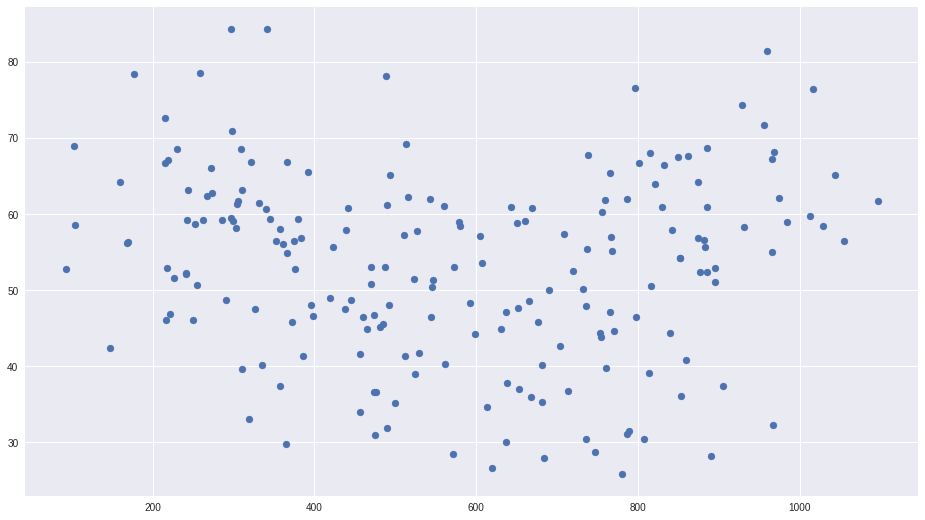

In [7]:
plt.scatter(df['height'], df['weight']);

Now that we've got a dataset, let's look at some options for scaling the data.  As well as how the data might be scaled.  There are two very common types of feature scaling that we should discuss:


**I.  MinMaxScaler**

In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value.  In these cases, you will want to use **MinMaxScaler**.

**II. StandardScaler**

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1.  In these cases, you will want to use **StandardScaler**.  

It is probably more appropriate with this data to use **StandardScaler**.  However, to get practice with feature scaling methods in python, we will perform both.

`2.` First let's fit the **StandardScaler** transformation to this dataset.  I will do this one so you can see how to apply preprocessing in sklearn.

In [0]:
df_ss = p.StandardScaler().fit_transform(df) # Fit and transform the data

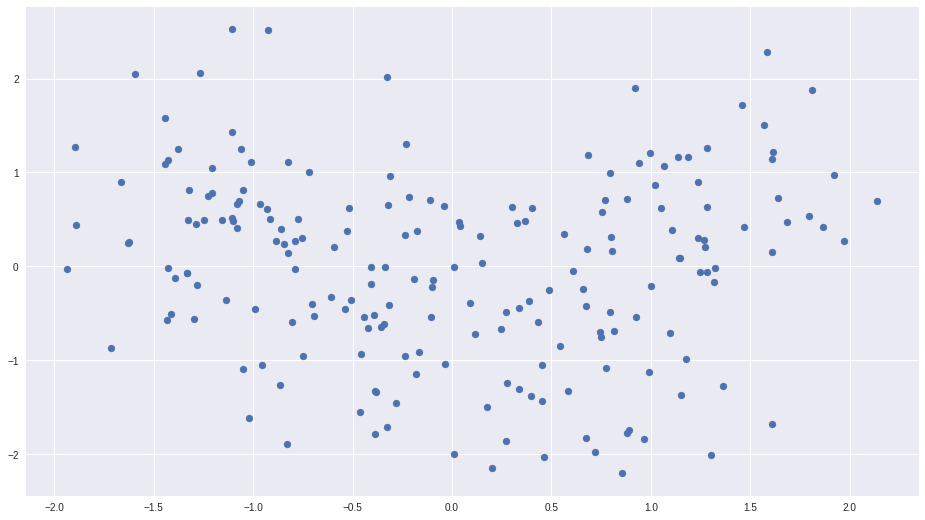

In [9]:
df_ss = pd.DataFrame(df_ss) #create a dataframe
df_ss.columns = ['height', 'weight'] #add column names again

plt.scatter(df_ss['height'], df_ss['weight']); # create a plot

`3.` Now it's your turn.  Try fitting the **MinMaxScaler** transformation to this dataset. You should be able to use the previous example to assist.

In [0]:
df_mm = p.MinMaxScaler().fit_transform(df) # fit and transform

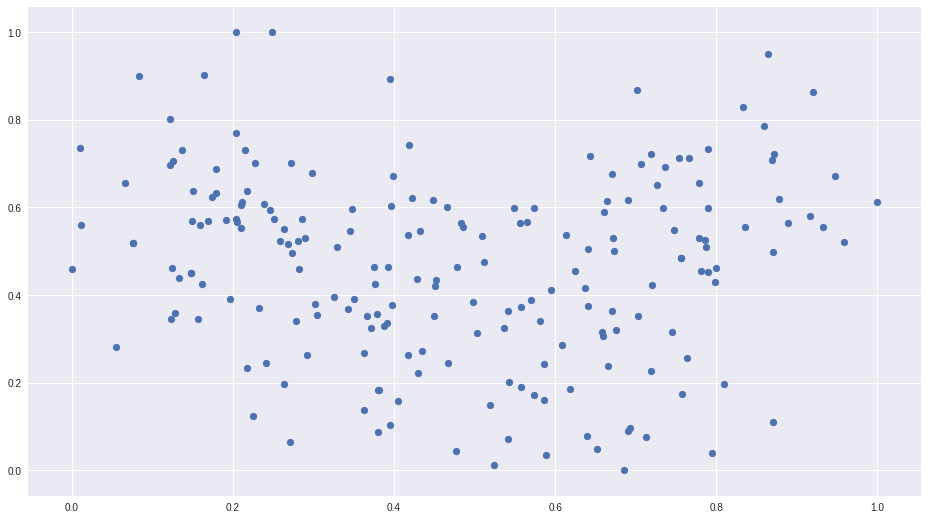

In [11]:
df_mm = pd.DataFrame(df_mm) #create a dataframe
df_mm.columns = ['height', 'weight'] #change the column names

plt.scatter(df_mm['height'], df_mm['weight']); #plot the data

`4.`  Now let's take a look at how kmeans divides the dataset into different groups for each of the different scalings of the data.  Did you end up with different clusters when the data was scaled differently?

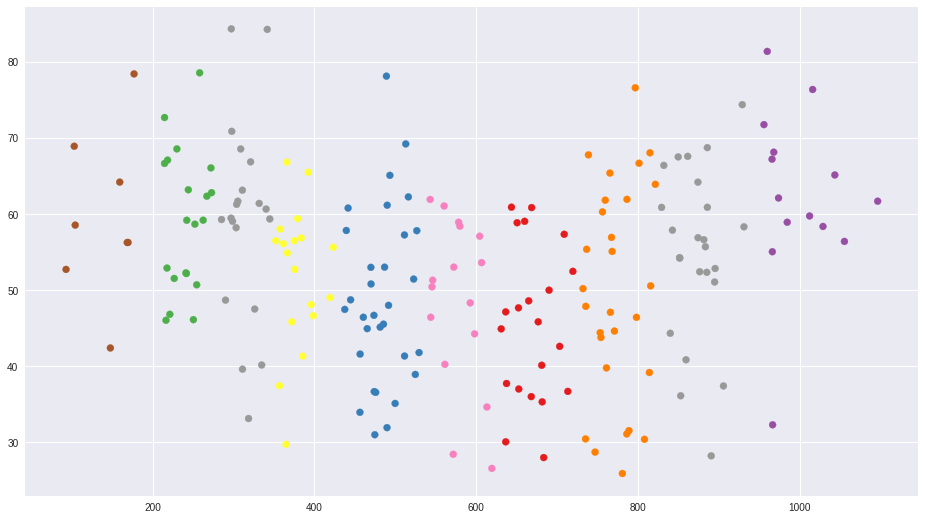

In [12]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df, 10) #fit kmeans to get the labels
    
# Plot the original data with clusters
plt.scatter(df['height'], df['weight'], c=labels, cmap='Set1');

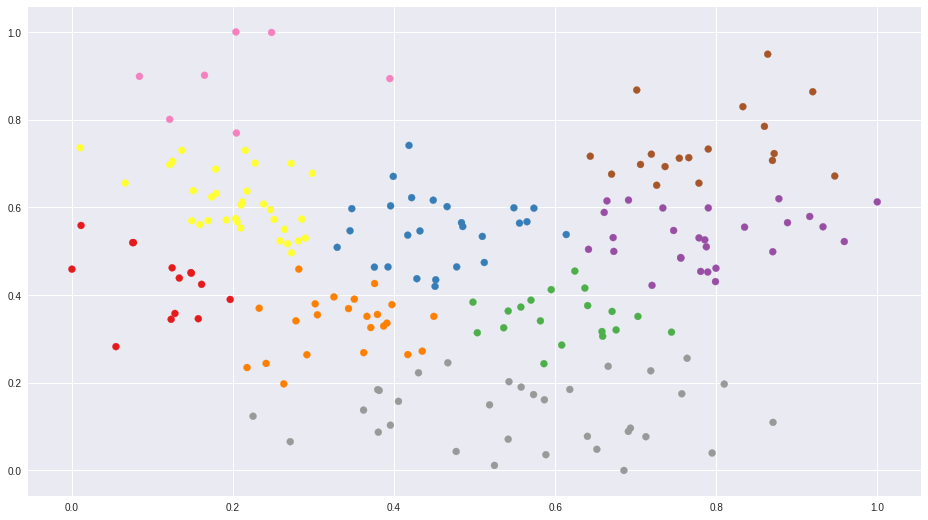

In [13]:
labels = fit_kmeans(df_mm, 10) #fit kmeans to get the labels
    
#plot each of the scaled datasets
plt.scatter(df_mm['height'], df_mm['weight'], c=labels, cmap='Set1');

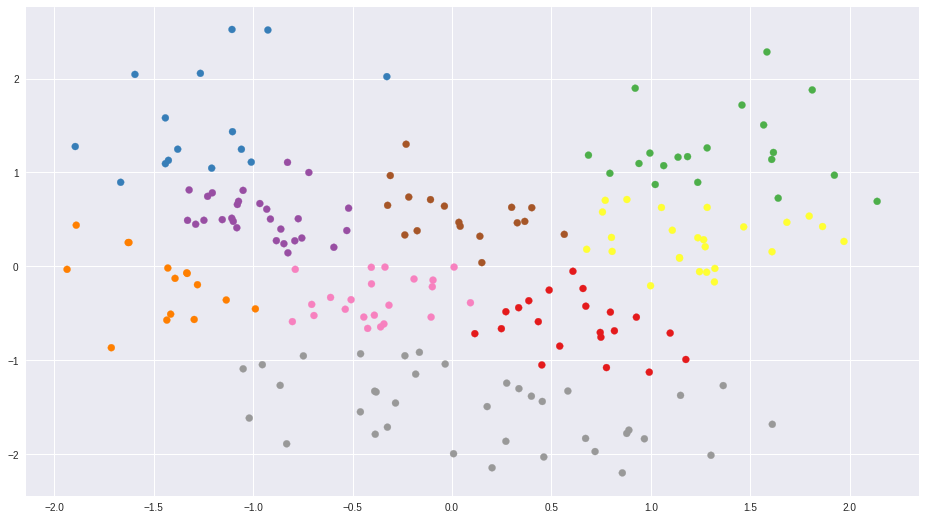

In [14]:
labels = fit_kmeans(df_ss, 10)

plt.scatter(df_ss['height'], df_ss['weight'], c=labels, cmap='Set1');